# Project: Wrangling and Analyze Data

In [1]:
# importing the needed libraries

import pandas as pd
import numpy as np
import json
import time
import datetime
import tweepy


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_Dogs = pd.read_csv('twitter-archive-enhanced.csv')

In [11]:
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# importing the requests library
import requests

# Gathering the dataset using the requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#saving tsv file
with open ("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

#Read tsv file
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

### 3. Download Tweet JSON Data

Note: using the twitter developer account to extract tweet data is very cumbersome and time consuming. hence, the code will be run once and commented out. then result will be stored in 

In [4]:
# pip install --upgrade tweepy

Note: you may need to restart the kernel to use updated packages.


Use the developer account info to create twitter api object

In [4]:
import tweepy

consumer_key = '***'
consumer_secret = '***'
access_token = '***'
access_secret = '***'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 wait_on_rate_limit = True
                 )

In [13]:
# tweet_ids = df_Dogs.tweet_id.values
# print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

# count = 0
# tweet_json_list = []
# fails_dict = {}

# start_time = time.time()

# for tweet_id in tweet_ids:
#     count += 1
#     try:
#         # attempt to get the tweet's JSON data and append to the tweet JSON list
#         tweet = api.get_status(tweet_id, tweet_mode = 'extended')
#         tweet_json_list.append(tweet._json)
#     except tweepy.TweepyException as err:
#         # save the error to the fail dictionary for review
#         print("TweepError for id:  " + str(tweet_id))
#         fails_dict[tweet_id] = err
#         pass
#     # To save space, only print out loop/tweet id for every 100th tweet
#     if count % 100 == 0:
#         print("loop # " + str(count))

# elapsed_time = time.time() - start_time

# elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
# print("\nTime elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

# # display list of tweets with errors
# print("Number of TweepErrors:  {}\n".format(len(fails_dict)))
# for tweet_id in fails_dict:
#     print(tweet_id, fails_dict[tweet_id])

# of tweet_ids: 2356

TweepError for id:  888202515573088257
TweepError for id:  873697596434513921
loop # 100
TweepError for id:  872668790621863937
TweepError for id:  872261713294495745
TweepError for id:  869988702071779329
TweepError for id:  866816280283807744
TweepError for id:  861769973181624320
TweepError for id:  856602993587888130
TweepError for id:  856330835276025856
loop # 200
TweepError for id:  851953902622658560
TweepError for id:  851861385021730816
TweepError for id:  845459076796616705
TweepError for id:  844704788403113984
TweepError for id:  842892208864923648
TweepError for id:  837366284874571778
TweepError for id:  837012587749474308
loop # 300
TweepError for id:  829374341691346946
TweepError for id:  827228250799742977
loop # 400
loop # 500
TweepError for id:  812747805718642688
TweepError for id:  802247111496568832
loop # 600
loop # 700
TweepError for id:  779123168116150273
TweepError for id:  775096608509886464
loop # 800
TweepError for id:  771004394259

Rate limit reached. Sleeping for: 290


TweepError for id:  759923798737051648
TweepError for id:  759566828574212096
loop # 900
TweepError for id:  754011816964026368
loop # 1000
loop # 1100
loop # 1200
loop # 1300
loop # 1400
loop # 1500
loop # 1600
loop # 1700
TweepError for id:  680055455951884288


Rate limit reached. Sleeping for: 686


loop # 1800
loop # 1900
loop # 2000
loop # 2100
loop # 2200
loop # 2300

Time elapsed (HH:MM:SS):  00:25:36

Number of TweepErrors:  29

888202515573088257 404 Not Found
144 - No status found with that ID.
873697596434513921 404 Not Found
144 - No status found with that ID.
872668790621863937 404 Not Found
144 - No status found with that ID.
872261713294495745 404 Not Found
144 - No status found with that ID.
869988702071779329 404 Not Found
144 - No status found with that ID.
866816280283807744 404 Not Found
144 - No status found with that ID.
861769973181624320 404 Not Found
144 - No status found with that ID.
856602993587888130 404 Not Found
144 - No status found with that ID.
856330835276025856 404 Not Found
144 - No status found with that ID.
851953902622658560 404 Not Found
144 - No status found with that ID.
851861385021730816 404 Not Found
144 - No status found with that ID.
845459076796616705 404 Not Found
144 - No status found with that ID.
844704788403113984 404 Not Found
14

In [23]:
# # save the JSON data in the list to the output file
# with open('tweet_json.txt', mode = 'w') as outfile:
#     for tweet_json in tweet_json_list:
#         json.dump(tweet_json, outfile)
#         outfile.write('\n')

In [24]:
# # read in the JSON data from the text file, and save to a DataFrame
# tweet_json_data = []

# with open('tweet_json.txt', 'r') as json_file:
#     # read the first line to start the loop
#     line = json_file.readline()
#     while line:
#         data = json.loads(line)

#         # extract variables from the JSON data
#         data_id = data['id']
#         data_retweet_count = data['retweet_count']
#         data_favorite_count = data['favorite_count']
        
#         # create a dictionary with the JSON data, then add to a list
#         json_data = {'tweet_id': data_id, 
#                      'retweet_count': data_retweet_count, 
#                      'favorite_count': data_favorite_count
#                     }
#         tweet_json_data.append(json_data)

#         # read the next line of JSON data
#         line = json_file.readline()
#         # ----- while -----

# # convert the tweet JSON data dictionary list to a DataFrame
# df_tweetscount = pd.DataFrame(tweet_json_data, 
#                                    columns = ['tweet_id',
#                                               'retweet_count',
#                                               'favorite_count'])

# df_tweetscount.head(30)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33796
1,892177421306343426,5301,29317
2,891815181378084864,3481,22045
3,891689557279858688,7217,36901
4,891327558926688256,7760,35275
5,891087950875897856,2599,17795
6,890971913173991426,1663,10351
7,890729181411237888,15753,56813
8,890609185150312448,3620,24516
9,890240255349198849,6098,27942


In [ ]:
# df_tweetscount.info()

In [ ]:
# df_tweetscount.to_csv('tweet_data_extra.csv', index = False)

### Alternatively, we can read the local file (tweet_json.txt) in the system

In [25]:
# read from the locally saved tweet_json.txt
tweets = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweets.append(data)

In [54]:
df_tweetscount = pd.DataFrame(tweets, columns = ['id', 'retweet_count', 'favorite_count'])

df_tweetscount

,id,retweet_count,favorite_count
0,892420643555336193,7009,33796
1,892177421306343426,5301,29317
2,891815181378084864,3481,22045
3,891689557279858688,7217,36901
4,891327558926688256,7760,35275
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Assessing Data

In this section, the gathered dataset will be assessed via two main methods; visual and programmatic assessment. These form of assessments will enable us identify the quality and tidiness issues associated with the dataset.

The following has to be noted;

- Only original ratings that have images are needed.
- 8 quality issues and 2 tidiness issues will be discussed

In [28]:
pd.set_option('display.max_column', None)

pd.set_option('display.max_colwidth', None)

In [29]:
df_Dogs.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [30]:
df_Dogs.text.head(10)

0                                                             This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1        This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                         This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                   This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4        This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
5        Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #B

In [31]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [32]:
df_Dogs.name.value_counts().head(40)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Phil         5
Sammy        5
Gus          5
Chester      5
Alfie        5
Sunny        5
Bentley      5
very         5
Oakley       5
Finn         5
Name: name, dtype: int64

In [33]:
list(df_Dogs)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [34]:
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [35]:
df_image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [36]:
df_image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [37]:
df_Dogs.name.value_counts().tail(20)

Zoe           1
Gilbert       1
Rose          1
Theo          1
Fido          1
Emma          1
Spencer       1
Lilli         1
Boston        1
Brandonald    1
Corey         1
Leonard       1
Beckham       1
Devón         1
Gert          1
Dex           1
Ace           1
Tayzie        1
Grizzie       1
Christoper    1
Name: name, dtype: int64

In [38]:
list(df_image)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [39]:
list(df_tweetscount)

['id', 'retweet_count', 'favorite_count']

In [40]:
df_Dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [41]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [42]:
df_tweetscount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [43]:
df_Dogs.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [44]:
df_image.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [45]:
df_tweetscount.nunique()

id                2327
retweet_count     1671
favorite_count    1968
dtype: int64

In [46]:
df_Dogs['rating_numerator'].value_counts().sort_index(ascending=False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [47]:
df_Dogs[df_Dogs.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Cloud\AppData\Local\Temp\ipykernel_13300\1539768562.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_Dogs[df_Dogs.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [48]:
df_Dogs.loc[45,:].text

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [49]:
df_Dogs.loc[340,:].text

"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

In [50]:
df_Dogs['rating_denominator'].value_counts().sort_index(ascending=False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [51]:
df_Dogs['name'].value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Name: name, dtype: int64

In [52]:
df_Dogs['expanded_urls'].nunique()

2218

### Quality issues

#### df_Dogs Table

1.Incorrect datatypes e.g. timestamp datatype is object instead of datetime and rating numerator datatype is integer instead of float


2.Improper extratction of rating_numerator. 6 rows with incorrect rating numerator

3.missing values in some columns (retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id and expanded_url)

4.Name column containing rows that are not valid (rows having names such as an, a, the) and names starting with lower cases that are most likely not names of Dogs


#### df_image_pred table
5.case inconsistencies in the entries of p1, p2, and p3. sometimes entries in lower case, other times entries in capitalize case 

#### df_tweetscount table

6.tweet id column name does not correlate with the tweet_id name on the Dogs_Rating Table 

### Tidiness issues

1.Dogs_Rating Table - Multiple column for Dog stages (dogo, fluffer, pupper and puppo)

2.Information spread across three tables. One table needed to into one to give one final dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [55]:
# Make copies of original pieces of data

df_Dogs_clean = df_Dogs.copy()

df_image_clean = df_image.copy()

df_tweetscount_clean = df_tweetscount.copy()


### Quality Issue #1: Incorrect datatypes e.g. timestamp datatype is object instead of datetime and rating numerator datatype is integer instead of float

#### Define: Convert timestamp to the correct datatype (datetime)

#### Code

In [56]:
df_Dogs_clean['timestamp'] = pd.to_datetime(df_Dogs_clean['timestamp'])

#### Test

In [57]:
df_Dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### rating_numerator is integer datatype instead of float

#### Define: Convert rating_numerator to float datatype

#### Code

In [58]:
df_Dogs_clean['rating_numerator'] = df_Dogs_clean.rating_numerator.astype(float)

#### Test

In [59]:
df_Dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

### Quality Issue #2: Improper extratction of rating_numerator. 6 rows with incorrect rating numerator

#### Define: Extract rating_numerator accurately

#### Code

In [60]:
df_Dogs_clean['rating_numerator'] = df_Dogs_clean.text.str.extract('(\d+\.?\d*)', expand = True)

#### Test

In [61]:
df_Dogs_clean[df_Dogs_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Cloud\AppData\Local\Temp\ipykernel_13300\3280258299.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_Dogs_clean[df_Dogs_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


In [62]:
print(df_Dogs_clean.loc[45,:].text)

df_Dogs_clean.loc[45,:].rating_numerator

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948


'13.5'

In [63]:
print(df_Dogs_clean.loc[1712,:].text)

df_Dogs_clean.loc[1712,:].rating_numerator

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


'11.26'

### Quality Issue #3: missing values in some columns (retweeted_status_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id and expanded_url)

#### Define: Filter retweeted_status_id to drop rows with retweeted_status_id as non null

#### Code

In [64]:
df_Dogs_clean = df_Dogs_clean[df_Dogs_clean.retweeted_status_id.isnull() == True]

#### Test

In [65]:
print(df_Dogs_clean.retweeted_status_id.nunique())

print(df_Dogs_clean.shape)

df_Dogs_clean.sample(10)

0
(2175, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
282,839239871831150596,NaN,NaN,2017-03-07 22:22:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Odie. He's big. 13/10 would attempt to ride https://t.co/JEXB9RwBmm,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/839239871831150596/photo/1,https://twitter.com/dog_rates/status/839239871831150596/photo/1,https://twitter.com/dog_rates/status/839239871831150596/photo/1",13,10,Odie,None,None,None,None
2185,668986018524233728,NaN,NaN,2015-11-24 02:54:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ruby. She's a Bimmington Fettuccini. One ear works a lil better than other. Looks startled. Cool carpet 9/10 https://t.co/j0Wpa42KCH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668986018524233728/photo/1,9,10,Ruby,None,None,None,None
570,801854953262350336,8.018543e+17,1.185634e+07,2016-11-24 18:28:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",.@NBCSports OMG THE TINY HAT I'M GOING TO HAVE TO SAY 11/10 NBC,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1109,733828123016450049,NaN,NaN,2016-05-21 01:13:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Terry. The harder you hug him the farther his tongue sticks out. 10/10 magical af https://t.co/RFToQQI8fJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/733828123016450049/photo/1,https://twitter.com/dog_rates/status/733828123016450049/photo/1",10,10,Terry,None,None,None,None
394,825829644528148480,NaN,NaN,2017-01-29 22:15:05+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Toby. He just found out you only pretend to throw the ball sometimes. H*ckin puppalled. 12/10 would console https://t.co/YimNdkZrhM,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/825829644528148480/photo/1,https://twitter.com/dog_rates/status/825829644528148480/photo/1",12,10,Toby,None,None,None,None
295,837471256429613056,NaN,NaN,2017-03-03 01:14:41+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Vincent. He's suave as h*ck. Will be your copilot this evening. Claims he doesn't need to look at the directions. 12/10 https://t.co/u51tzXSVi3,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/837471256429613056/photo/1,https://twitter.com/dog_rates/status/837471256429613056/photo/1",12,10,Vincent,None,None,None,None
564,802323869084381190,NaN,NaN,2016-11-26 01:31:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Severus. He's here to fix your cable. Looks like he succeeded. Even offered to pupgrade your plan. 13/10 h*ckin helpful https://t.co/aX4brLLpWZ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/802323869084381190/photo/1,https://twitter.com/dog_rates/status/802323869084381190/photo/1,https://twitter.com/dog_rates/status/802323869084381190/photo/1,https://twitter.com/dog_rates/status/802323869084381190/photo/1",13,10,Severus,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805382717440/photo/1,14,10,None,None,None,None,None
1564,688116655151435777,NaN,NaN,2016-01-15 21:52:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please send dogs. I'm tired of seeing other stuff like this dangerous pirate. We only rate dogs. Thank you... 10

### in_reply_to_status_id

#### Define: Filter in_reply_to_status_id to drop rows with null entries

#### Drop all 78 rows that are reply tweets

In [66]:
df_Dogs_clean = df_Dogs_clean[df_Dogs_clean.in_reply_to_status_id.isnull() == True]

#### Test

In [67]:
df_Dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   object          

####  Drop all empty columns (in_reply_to_status_id and in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp)

#### Code

In [68]:
df_Dogs_clean = df_Dogs_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                    'retweeted_status_id', 'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis=1)

#### Test

In [69]:
print(df_Dogs_clean.shape)

df_Dogs_clean.info()

(2097, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   object             
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](

### drop rows in expanded_urls column containing missing values

#### Define: Drop all rows containing missing tweet link

#### Code:

In [72]:
df_Dogs_clean = df_Dogs_clean[df_Dogs_clean.expanded_urls.notnull()]

#### Test

In [73]:
df_Dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   object             
 6   rating_denominator  2077 non-null   int64              
 7   name                2077 non-null   object             
 8   doggo               2077 non-null   object             
 9   floofer             2077 non-null   object             
 10  pupper              2077 non-null   object             
 11  puppo               2077 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### drop rows having multiple values of 10 in the rating_denominator

#### Define: Drop tweets with rating_denominator that are not equal to 10

#### Code

In [70]:
df_Dogs_clean = df_Dogs_clean[df_Dogs_clean.rating_denominator == 10]

#### Test

In [71]:
print(df_Dogs_clean['rating_denominator'].value_counts())

df_Dogs_clean.info()

10    2080
Name: rating_denominator, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   int64              
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   object             
 6   rating_denominator  2080 non-null   int64              
 7   name                2080 non-null   object             
 8   doggo               2080 non-null   object             
 9   floofer             2080 non-null   object             
 10  pupper              2080 non-null   object             
 11  puppo               2080 non-null   object   

### Quality Issue #4: df_Dogs Table - Name column containing rows that are not valid (rows having names such as an, a, the) and names starting with lower cases that are most likely names of Dogs

#### Define: Replace lowercase names with the "None" string for uniformity

#### Code

In [74]:
df_Dogs_clean.loc[(df_Dogs_clean.name.str.contains('^[a-z]', regex = True)), 'name'] = "None"

#### Test

In [75]:
df_Dogs_clean.name.value_counts().head(20)

None       690
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Winston      8
Lola         8
Sadie        8
Daisy        7
Toby         7
Bo           6
Stanley      6
Bella        6
Bailey       6
Jax          6
Koda         6
Oscar        6
Dave         5
Name: name, dtype: int64

### Quality Issue #5: df_image table - case inconsistencies in the entries of p1, p2, and p3. sometimes entries in lower case, other times entries in capitalize case

#### Define: make all the entries in the p1, p2, and p3 columns to be in lower case

#### Code

In [79]:
df_image_clean.p1 = df_image_clean.p1.apply(lambda x: x.lower())
df_image_clean.p2 = df_image_clean.p2.apply(lambda x: x.lower())
df_image_clean.p3 = df_image_clean.p3.apply(lambda x: x.lower())

#### Test

In [80]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Quality Issue #6: df_tweetscount Table - tweet id column name does not correlate with the tweet_id name on the Dogs_Rating table making merging of the two tables impossible

#### Define: Rename id column name to tweet_id

#### Code

In [81]:
df_tweetscount_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

#### Test

In [82]:
df_tweetscount_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33796
1,892177421306343426,5301,29317
2,891815181378084864,3481,22045
3,891689557279858688,7217,36901
4,891327558926688256,7760,35275


In [83]:
df_tweetscount_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### Tidiness Issue #1: df_Dogs Table - Multiple column for Dog stages (doggo, fluffer, pupper and puppo)

#### Define: Merge all four columns into one column named Dog_stages and drop all individual columns (doggo, fluffer, pupper and puppo)

#### Code

In [88]:
df_Dogs_clean['Dog_stages'] = df_Dogs_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ','.join(x.astype(str)), axis=1)

df_Dogs_clean['Dog_stages'] = df_Dogs_clean['Dog_stages'].str.replace(",None|None,", "", regex = True)

df_Dogs_clean = df_Dogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

KeyError: "None of [Index(['doggo', 'floofer', 'pupper', 'puppo'], dtype='object')] are in the [columns]"

#### Test

In [85]:
print(df_Dogs_clean.shape)

print(df_Dogs_clean.info())

df_Dogs_clean.sample(15)

(2077, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   int64              
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2077 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   object             
 6   rating_denominator  2077 non-null   int64              
 7   name                2077 non-null   object             
 8   Dog_stages          2077 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 162.3+ KB
None


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stages
239,846874817362120707,2017-03-29 00:01:05+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tuck. As you can see, he's rather h*ckin rare. Taken seriously until his legs are seen. Tail stuck in a permanent zoom. 13/10 https://t.co/P7PBGqrKSe","https://twitter.com/dog_rates/status/846874817362120707/photo/1,https://twitter.com/dog_rates/status/846874817362120707/photo/1",13,10,Tuck,None
1390,700151421916807169,2016-02-18 02:54:41+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",If a pupper gave that to me I'd probably start shaking and faint from all the joy. 11/10 https://t.co/o9aJVPB25n,https://twitter.com/dog_rates/status/700151421916807169/photo/1,11,10,None,pupper
536,807010152071229440,2016-12-08 23:53:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lennon. He's a Boopershnoop Pupperdoop. Quite rare. Exceptionally pettable. 12/10 would definitely boop that shnoop https://t.co/fhgP6vSfhX,https://twitter.com/dog_rates/status/807010152071229440/photo/1,12,10,Lennon,None
322,834167344700198914,2017-02-21 22:26:07+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sunshine. She doesn't believe in personal space. Eyes pretty far apart for a dog. Has horns (whoa). 11/10 would pet with wonder https://t.co/o3bhLguymB,https://twitter.com/dog_rates/status/834167344700198914/photo/1,11,10,Sunshine,None
2346,666058600524156928,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,None,None
2083,670811965569282048,2015-11-29 03:50:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Maggie. She enjoys her stick in the yard. Very content. Much tranquility. 10/10 keep it up pup https://t.co/eYP9i9gfYn,https://twitter.com/dog_rates/status/670811965569282048/photo/1,10,10,Maggie,None
153,862457590147678208,2017-05-11 00:01:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jersey. He likes to watch movies, but only if you watch with him. Enjoys horror films like The Bababork and H*ckraiser. 13/10 https://t.co/jvSNASweNb","https://twitter.com/dog_rates/status/862457590147678208/photo/1,https://twitter.com/dog_rates/status/862457590147678208/photo/1,https://twitter.com/dog_rates/status/862457590147678208/photo/1",13,10,Jersey,None
817,770772759874076672,2016-08-30 23:58:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sebastian. He's super h*ckin fluffy. That's really all you need to know. 11/10 would snug intensely https://t.co/lqr0NdtwQo,https://twitter.com/dog_rates/status/770772759874076672/photo/1,11,10,Sebastian,None
1968,673320132811366400,2015-12-06 01:56:44+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Frankie. He's wearing blush. 11/10 really accents the cheek bones https://t.co/iJABMhVidf,"https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1,https://twitter.com/dog_rates/status/673320132811366400/photo/1",11,10,Frankie,None
1234,712717840512598017,2016-03-23 19:09:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please don't send in any more polar bears. We only rate dogs. Thank you... 10/10 https://t.co/83RGhdIQz2,https://twitter.com/dog_rates/status/712717840512598

### Tidiness Issue #2: Information spread across three tables. Only one table needed.

#### Define: Merge all three tables into one by joining on the tweet_id column

In [86]:
df_Dogs_clean = pd.merge(pd.merge(df_Dogs_clean, df_tweetscount_clean,on = 'tweet_id', how = 'inner'),
                          df_image_clean, on = 'tweet_id', how = 'inner')


#### Test

In [87]:
print(df_Dogs_clean.info())

df_Dogs_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 1945
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1946 non-null   int64              
 1   timestamp           1946 non-null   datetime64[ns, UTC]
 2   source              1946 non-null   object             
 3   text                1946 non-null   object             
 4   expanded_urls       1946 non-null   object             
 5   rating_numerator    1946 non-null   object             
 6   rating_denominator  1946 non-null   int64              
 7   name                1946 non-null   object             
 8   Dog_stages          1946 non-null   object             
 9   retweet_count       1946 non-null   int64              
 10  favorite_count      1946 non-null   int64              
 11  jpg_url             1946 non-null   object             
 12  img_num             1946 non-null 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,7009,33796,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,5301,29317,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,3481,22045,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,7217,36901,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,7760,35275,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [89]:
df_Dogs_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, the cleaned dataset will be analyzed and visualized to get insight on the dataset

In [167]:
#Creating a copy of the dataset

df_Dogmaster = df_Dogs_clean.copy()

In [168]:
df_Dogmaster.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,7015,33836,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,5302,29348,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,3484,22069,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,7229,36961,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,7768,35338,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [169]:
df_Dogmaster[['rating_numerator', 'retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,1946.000000,1946.000000
mean,2257.299589,7768.925488
std,4041.869873,11447.585874
min,11.000000,66.000000
25%,495.500000,1630.750000
50%,1084.500000,3507.000000
75%,2588.000000,9686.000000
max,70804.000000,144994.000000


In [170]:
df_Dogmaster.Dog_stages.value_counts()

None             1644
pupper            201
doggo              62
puppo              22
doggo,pupper        8
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: Dog_stages, dtype: int64

In [171]:
df_Dogmaster.rating_numerator.value_counts()

12       434
10       404
11       375
13       245
9        139
8         94
7         47
6         34
5         31
14        30
3         26
2         21
4         21
1          7
0          5
8.         2
2015       2
100        2
31         2
92.49      1
11.26      1
400        1
420        1
8.98       1
2016.      1
61         1
97         1
33         1
80         1
2003.      1
17         1
47         1
1.         1
1776       1
2002       1
150.       1
50         1
2.         1
11.27      1
46         1
9.75       1
98         1
13.5       1
1949       1
Name: rating_numerator, dtype: int64

In [172]:
df_Dogmaster.name.value_counts()

None          607
Cooper         10
Charlie        10
Oliver         10
Tucker          9
             ... 
Glenn           1
Shelby          1
Sephie          1
Bonaparte       1
Christoper      1
Name: name, Length: 909, dtype: int64

### Insights:

The following insights were made after the wrangling process

1.A larger percentage of the tweets didn't have identifiable dog stages; 1,651 tweets. 10 tweets were identified as having double stages. Pupper stage had the highest identification with 201 tweets.

2.608 tweets do not have a name identity for the dogs.

3.Rating numerator of 12 has the highest value_counts and the least is rating numerator of zero(0)

4.A positive correlation between retweet_count and favorite_count. As retweet_count increased, favorite_count increased at the same time

### Visualization

In [173]:
# importing libraries needed for visualization

import matplotlib.pyplot as plt
import seaborn as sns

#### #1: A scatter plot of the retweet_count against favorite_count 

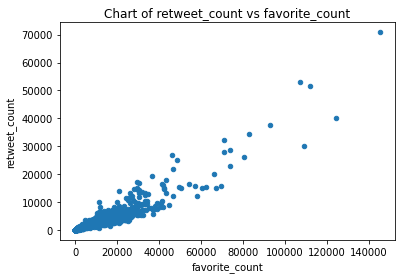

In [174]:
df_Dogmaster.plot(x='favorite_count', y='retweet_count', kind='scatter', title='Chart of retweet_count vs favorite_count');

#### #2: A bar chart of the various dog stages identified after cleaning

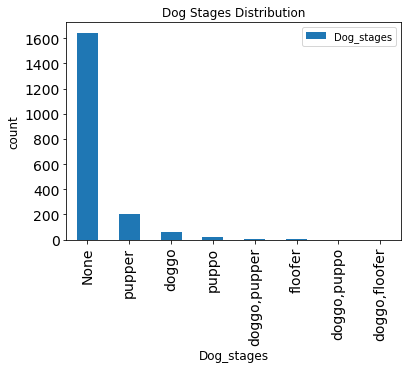

In [175]:
# A bar chart of the Dog_Stages will be plotted.
# This will show the count of the dog_stages combination in the dataset

df_Dogmaster['Dog_stages'].value_counts().plot(kind='bar', title='Dog Stages Distribution', fontsize=14)
plt.xlabel('Dog_stages', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend()